# PLOTS

**Shapefiles**

In [1]:
# Imports
library(sf)
library(ggplot2)
library(rnaturalearth)

# Set bw theme for all plots
theme_set(theme_bw())

# World map
world <- ne_countries(scale = "medium", returnclass = "sf")

# Read in shapefiles
chagos.simp = st_read("../Data/BIOT_DGBP/Chagos_v6_land_simple.shp")
chagos.land = st_read("../Data/BIOT_DGBP/Chagos_v6_land.shp")
chagos.back = st_read("../Data/BIOT_DGBP/Chagos_v6.shp")
eez = st_read("../Data/BIOT_DGBP/eez_noholes.shp")

Linking to GEOS 3.8.1, GDAL 3.2.1, PROJ 7.2.1



Reading layer `Chagos_v6_land_simple' from data source 
  `/Users/alexzamar/Desktop/CMEE/PROJECT/Data/BIOT_DGBP/Chagos_v6_land_simple.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 62 features and 20 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 71.23838 ymin: -7.444724 xmax: 72.49538 ymax: -5.235481
Geodetic CRS:  WGS 84
Reading layer `Chagos_v6_land' from data source 
  `/Users/alexzamar/Desktop/CMEE/PROJECT/Data/BIOT_DGBP/Chagos_v6_land.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 62 features and 20 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 71.23833 ymin: -7.444724 xmax: 72.49538 ymax: -5.235481
Geodetic CRS:  WGS 84
Reading layer `Chagos_v6' from data source 
  `/Users/alexzamar/Desktop/CMEE/PROJECT/Data/BIOT_DGBP/Chagos_v6.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 2001 features and 20 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 70.7791

# All GPS tracks

**Imports**

In [80]:
library(data.table)
library(ggplot2)
library(ggspatial)
library(stringr) ##
library(ggrepel)

options(repr.plot.width=15, repr.plot.height=15)  # Resize plot

**Plot**

In [83]:
flcities = data.frame(lng = c(-7.3195), lat = c(72.4229), city = c("Diego Garcia"))

In [98]:
head(gps_data_df)

TagID,X,Y,Z,Activity,Depth,Temp. (?C),location-lat,location-lon,height-msl,⋯,Sensor Raw,Metadata,Depth_mod,ix,datetime,dist_to_dg_m,dist_to_dg_km,time_diff_s,dist_moved_m,calc_sp_ms
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<lgl>,<dbl>,<int>,<dttm>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
ch_gps03_S1,0.188,-0.313,1.000,Active/Dry,0,27.1,-7.24941,72.45086,-6,⋯,995,NA,0,325,2019-02-02 13:20:01,375.3958,0.3753958,0,0.00000,NA
ch_gps03_S1,0.281,-0.047,1.094,Active/Dry,0,26.7,-7.24810,72.45079,16,⋯,995,NA,0,1100,2019-02-02 13:20:32,515.5071,0.5155071,31,146.03327,4.710751
ch_gps03_S1,0.844,-0.281,1.985,Active/Dry,0,26.6,-7.25031,72.45170,8,⋯,995,NA,0,1825,2019-02-02 13:21:01,252.0759,0.2520759,29,265.74866,9.163747
ch_gps03_S1,0.172,-0.203,1.125,Active/Dry,0,26.5,-7.24998,72.45129,32,⋯,995,NA,0,2575,2019-02-02 13:21:31,299.3297,0.2993297,30,58.30450,1.943483
ch_gps03_S1,0.281,-0.031,1.282,Active/Dry,0,26.5,-7.25050,72.45165,20,⋯,995,NA,0,3325,2019-02-02 13:22:01,232.6262,0.2326262,30,70.22273,2.340758
ch_gps03_S1,0.250,-0.047,0.844,Active/Dry,0,26.5,-7.25035,72.45128,20,⋯,995,NA,0,4075,2019-02-02 13:22:31,261.0019,0.2610019,30,44.13919,1.471306


In [106]:
?geom_text_repel

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



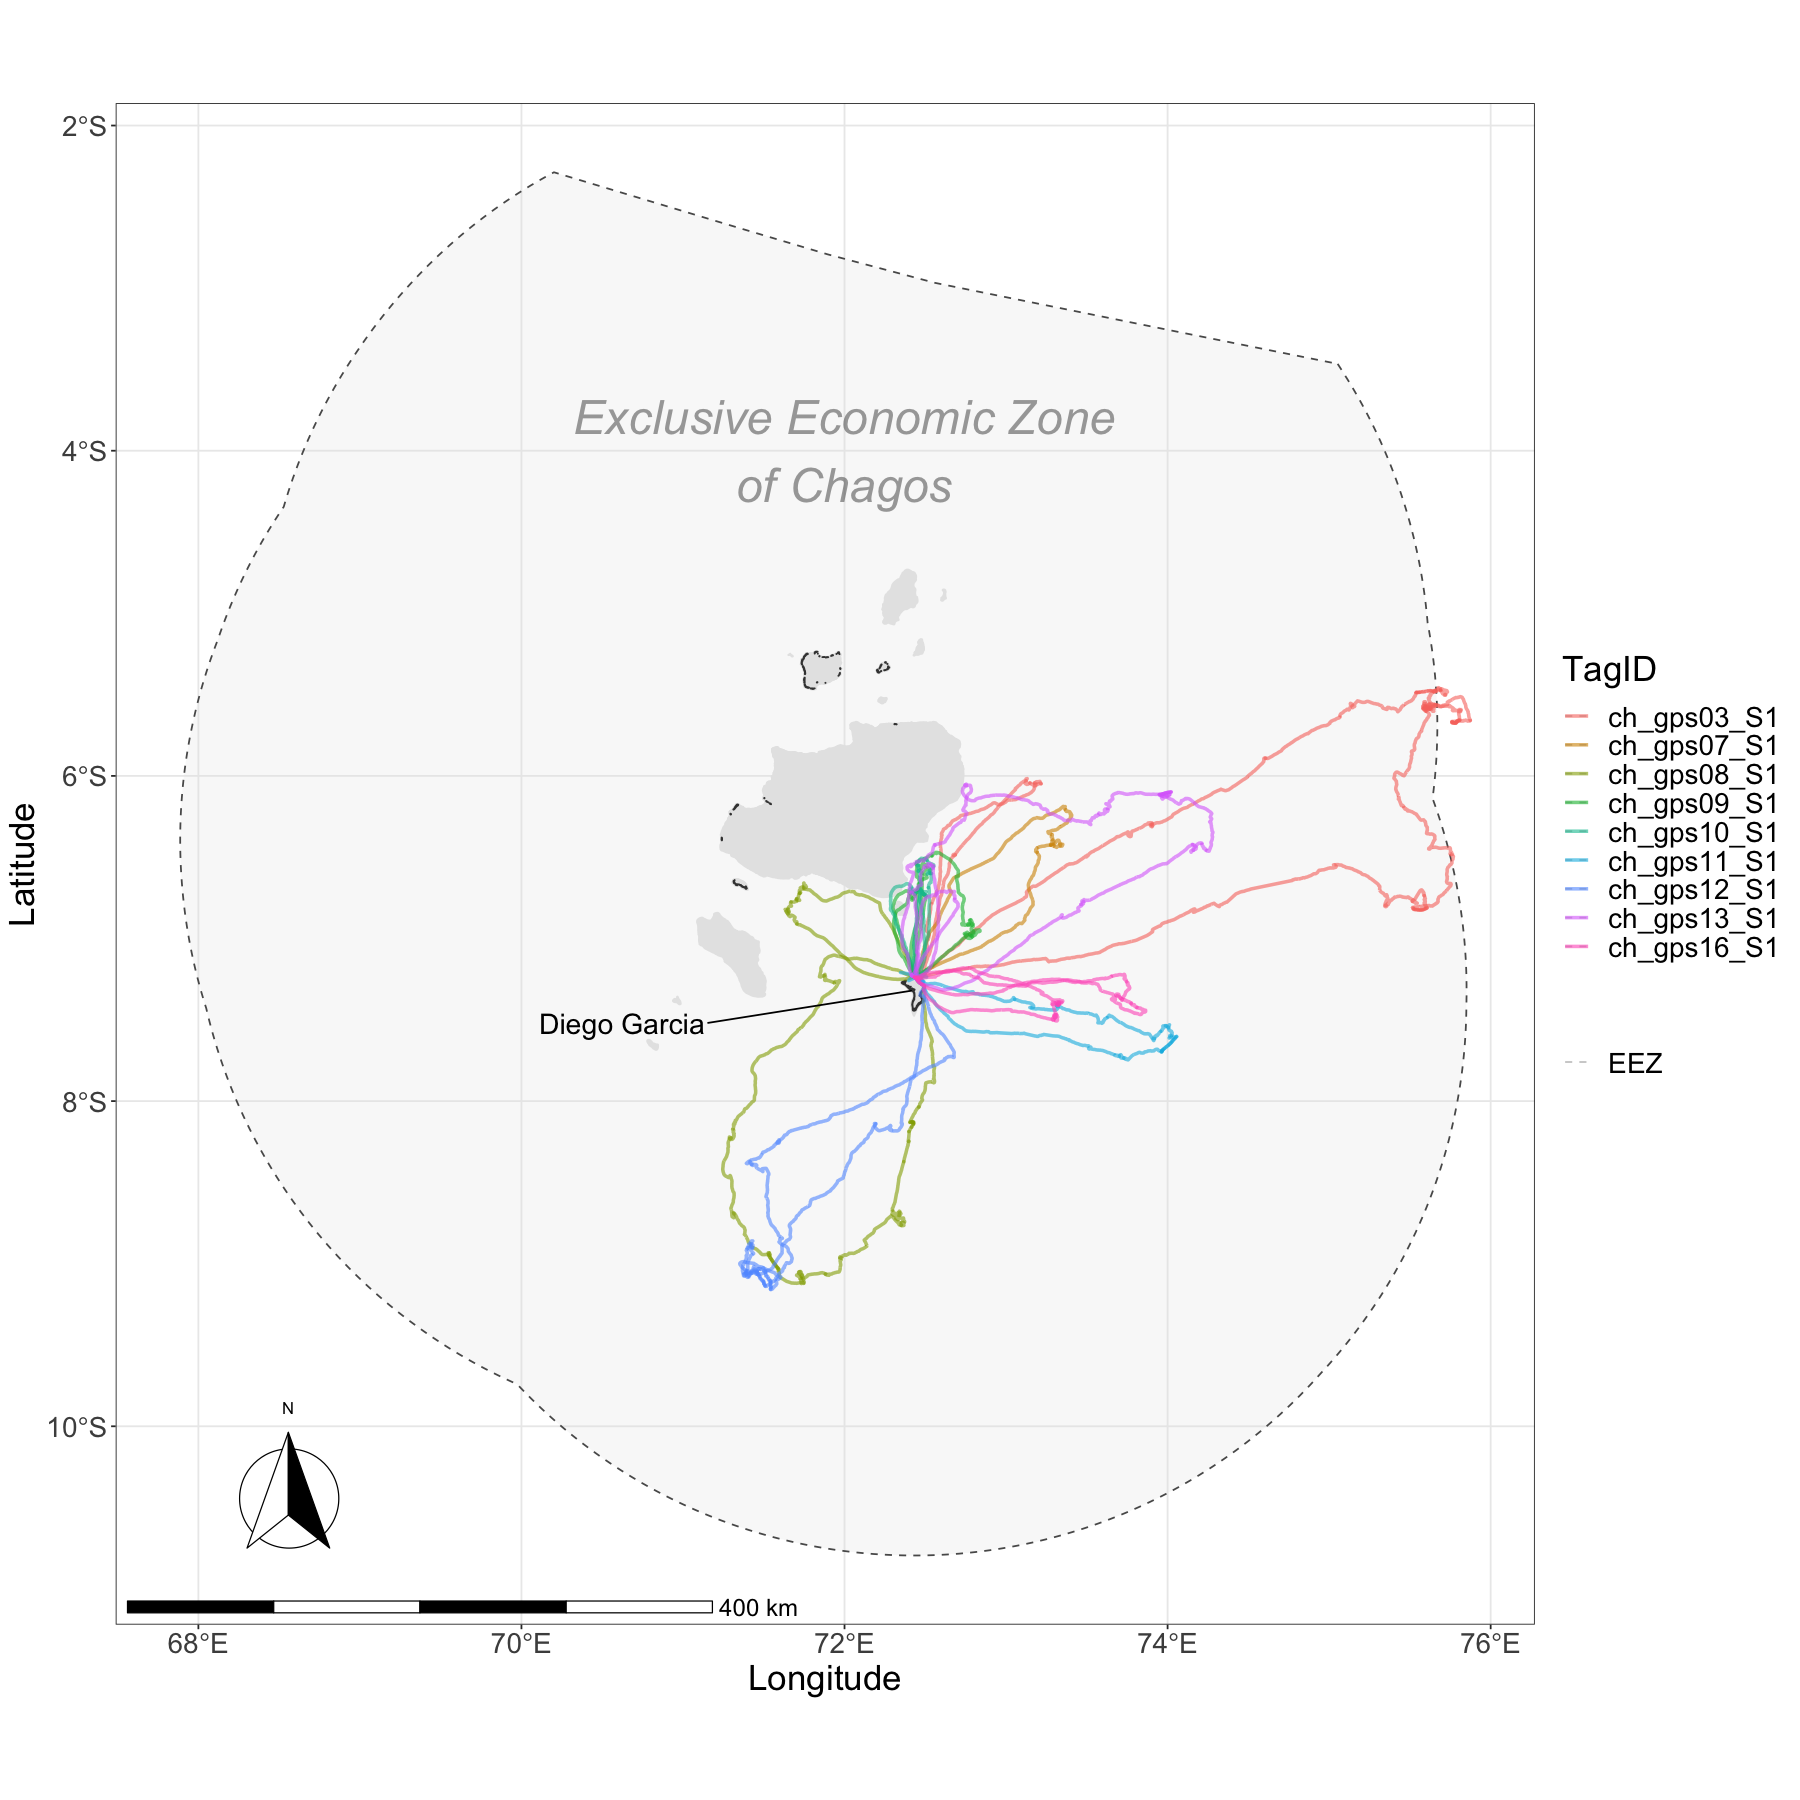

In [124]:
# Data import
gps_data_df = fread("../Data/BIOT_DGBP/all_gps_data.csv")
gps_data_df$TagID = str_remove(gps_data_df$TagID, "_gv[0-9]+_?[0-9]+") ## this can be removed also
birds = unique(gps_data_df$TagID)

# Plot
g <- ggplot(data = world) + 
      geom_sf(data = eez, alpha=0.25, linetype = "dashed", show.legend = "line") +  # MPA
      geom_sf(data = chagos.back, fill = 'gray90', colour = 'gray90') + 
      geom_sf(data = chagos.simp, colour='gray25', fill = 'gray25', size=0.5) +
      annotation_scale(location = "bl", width_hint = 0.5, text_cex = 1.2) + # scale bar
      #geom_point()+
      xlab("Longitude") + ylab("Latitude") + 
      #ggtitle("") +
      geom_path(data = gps_data_df, aes(x = `location-lon`, y = `location-lat`, colour=TagID), alpha=.6, size=1) +
      scale_fill_manual(values=rainbow(length(birds))) +
      annotate(geom = "text", x = 72, y = -4, label = "Exclusive Economic Zone\nof Chagos", 
               fontface = "italic", color = "grey27", size = 10, alpha=.5) + 
      theme(text = element_text(size = 21)) +
      annotation_north_arrow(location = "bl", which_north = "true", 
                             height = unit(3.5, "cm"),
                             width = unit(3.5, "cm"),
                             pad_x = unit(0.75, "in"), 
                             pad_y = unit(0.5, "in"),
                             style = north_arrow_fancy_orienteering) +
      geom_text_repel(data = data.frame(lng = c(-7.3195), lat = c(72.4229), label = c("Diego Garcia")), 
                    aes(x = lat, y = lng, label = label), 
                    nudge_x = -1.8, nudge_y = -0.2, size=6) +
      scale_fill_manual(name = "", values = c("EEZ" = "black"),
                      #guide = guide_legend(override.aes = list(linetype = "dashed"), 
                      #                                         shape = 16, fill = "black")
                       )

g

# Summary Stats

**Imports**

In [4]:
library(data.table)
library(gridExtra)
library(grid)
library(stringr)

options(repr.plot.width=15, repr.plot.height=15)  # Resize plot

**Load and modify summary stats table**

In [30]:
ss = fread('../Data/summary_stats.csv')

ss$BirdID = str_remove(ss$BirdID, "_gv[0-9]+_?[0-9]+") ## this can be removed also (just for stripping ID string)

# Wrap colnames
key_wraped = strwrap(colnames(ss), width = 15, simplify = FALSE)  
colnames(ss) = sapply(key_wraped, paste, collapse = "\n")

# Display
ss

BirdID,Time Tracked (days),Total Distance Travelled (km),Max Distance Travelled (km),Max Depth (m),Mean Depth (m),Dives,Non-dives
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
ch_gps03_S1,4.58,1908.11,420.19,10.15,0.18,456,395033
ch_gps07_S1,3.06,556.56,155.77,2.15,0.09,64,264296
ch_gps08_S1,5.01,1242.91,226.03,2.58,0.14,388,432150
ch_gps09_S1,3.40,749.53,86.34,1.91,0.11,200,293800
ch_gps10_S1,3.37,545.76,81.38,1.90,0.09,195,291223
ch_gps11_S1,2.08,651.14,182.49,2.59,0.21,188,179601
ch_gps12_S1,2.49,928.04,234.98,2.39,0.14,191,214882
ch_gps13_S1,4.14,1213.31,231.10,2.60,0.14,332,357052
ch_gps16_S1,3.11,838.36,157.68,2.53,0.33,375,268658


**Convert to grob object to plot alongside GPS plot**

In [31]:
# Grab theme to modify
tt1 = ttheme_default()

# Make table
ts = tableGrob(ss, 
               #cols=gsub("\\ ", "\\\n", names(ss)), 
               rows = NULL,
               theme = modifyList(tt1, list(core=list(bg_params = list(fill = c("white", "grey85")), 
                                                      fg_params = list(fontsize = 17), padding=unit(c(3, 10), "mm")), 
                                            colhead=list(bg_params=list(fill="grey75"), 
                                                        fg_params = list(fontsize = 17), padding=unit(c(3, 10), "mm")
                                                        )))) # Wrap headers
# Measure dimensions
ts$widths = unit(rep(1/ncol(ts), ncol(ts)), "npc")
th = sum(ts$heights)

**Plot**

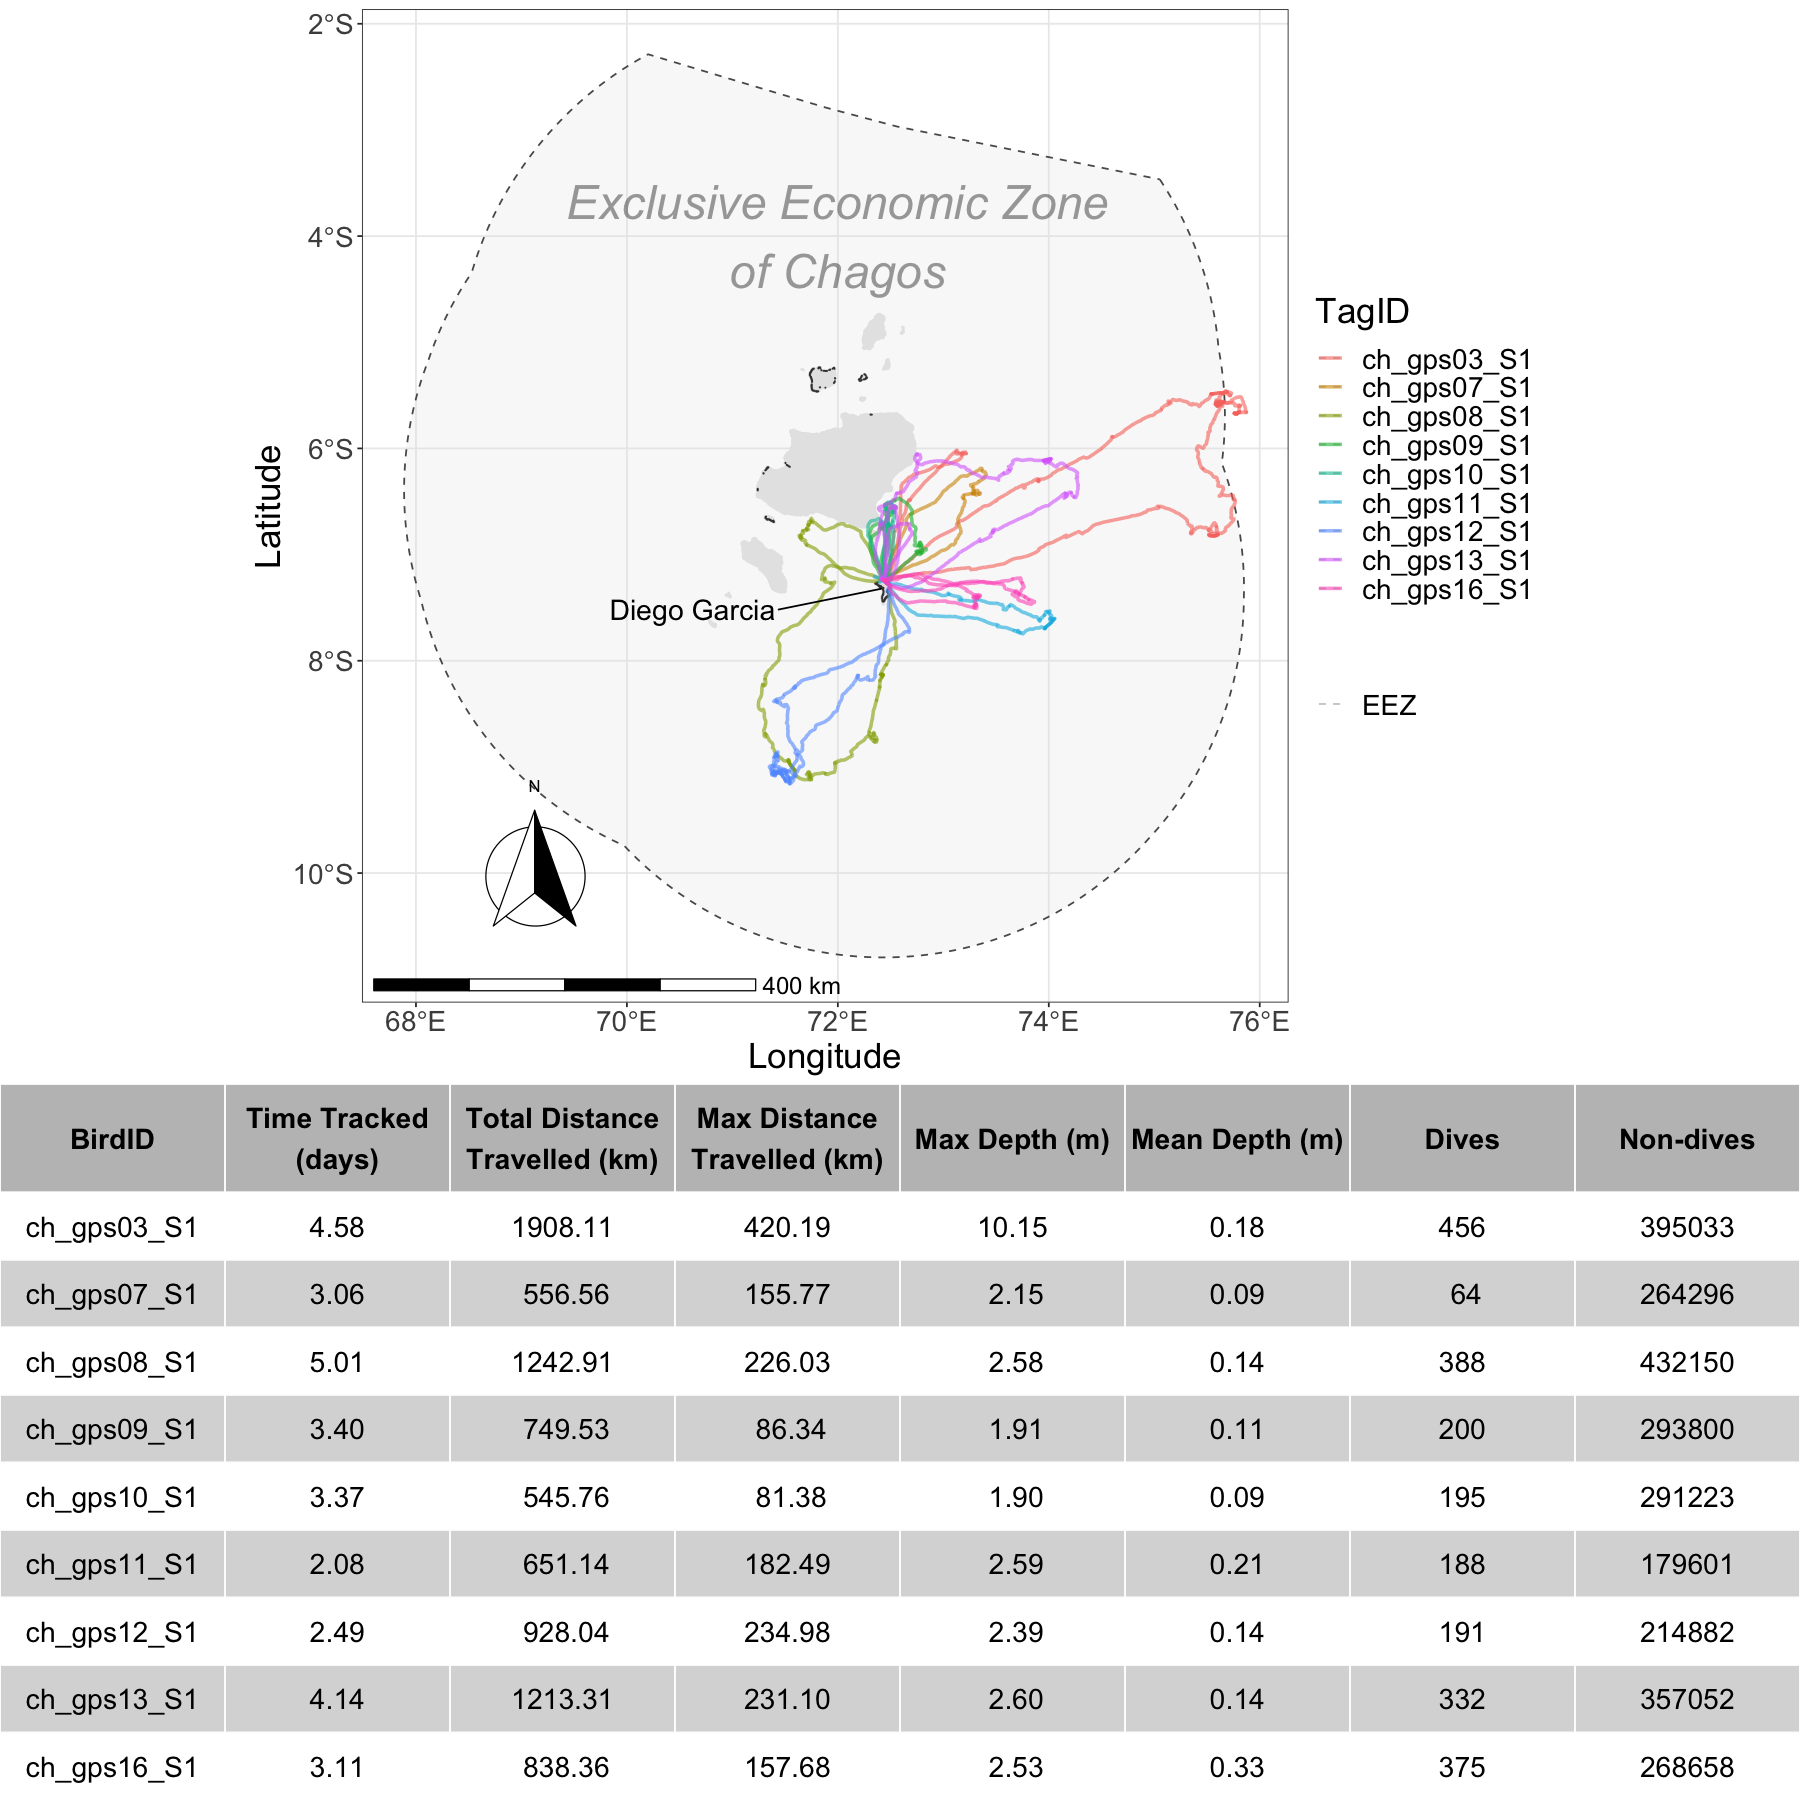

In [125]:
GG = grid.arrange(g, ts, heights=unit.c(unit(1, "null"), th))

**Fig X:** Flight paths for all 9 birds tagged with GPS devices on Diego Garcia in the Exclusive Economic Zone of Chagos (outlined). Summary statistics for each bird are also shown.

**Save**

In [126]:
ggsave(GG, file='../Plots/GPS_X_SUMSTATS.pdf', width = 15, height = 21)

# Model Evaluation Metrics

**Imports**

In [127]:
library(data.table)
library(ggplot2)
library(reshape2)
library(viridis)

options(repr.plot.width=15, repr.plot.height=10)  # Resize plot


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt


Loading required package: viridisLite



**Plots**

In [128]:
# Load data
cols = c('BirdID', 'Accuracy', 'AUC', 'Precision', 'Sensitivity', 'Specificity')
acc = fread('../Results/ACC_2_xval_metrics_keras.csv', select = cols, stringsAsFactors = TRUE)
imm = fread('../Results/IMM_360_xval_metrics_keras.csv', select = cols, stringsAsFactors = TRUE)

# Melt data
acc.m = melt(acc, id.var = 'BirdID')
acc.m$dtype = 'ACC'
imm.m = melt(imm, id.var = 'BirdID')
imm.m$dtype = 'IMM'
plot.dta = rbind(acc.m, imm.m)

**ggplot**

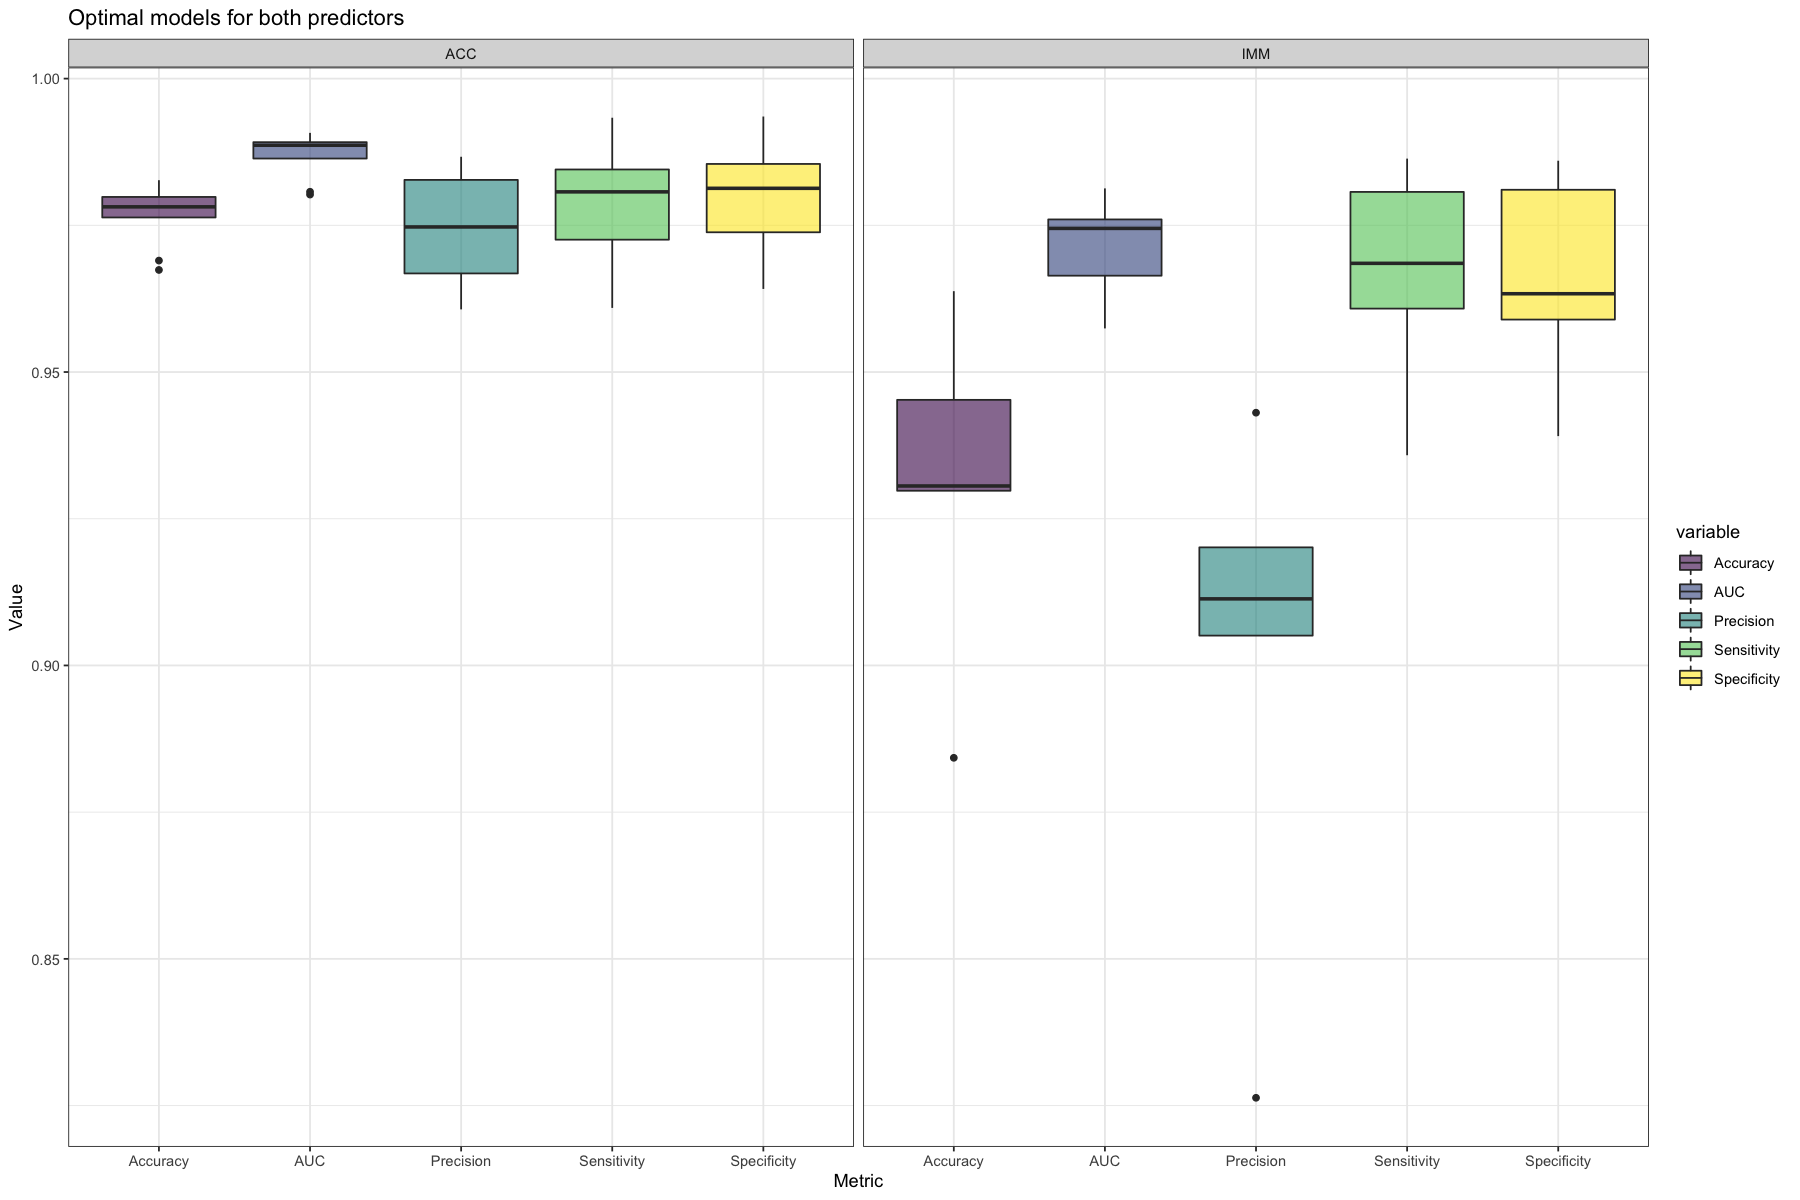

In [129]:
ggplot(data=plot.dta, aes(x=variable, y=value, fill=variable)) + geom_boxplot() + 
  facet_wrap(~dtype) + ggtitle("Optimal models for both predictors") +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    xlab("Metric") + ylab("Value")

**Base plot**

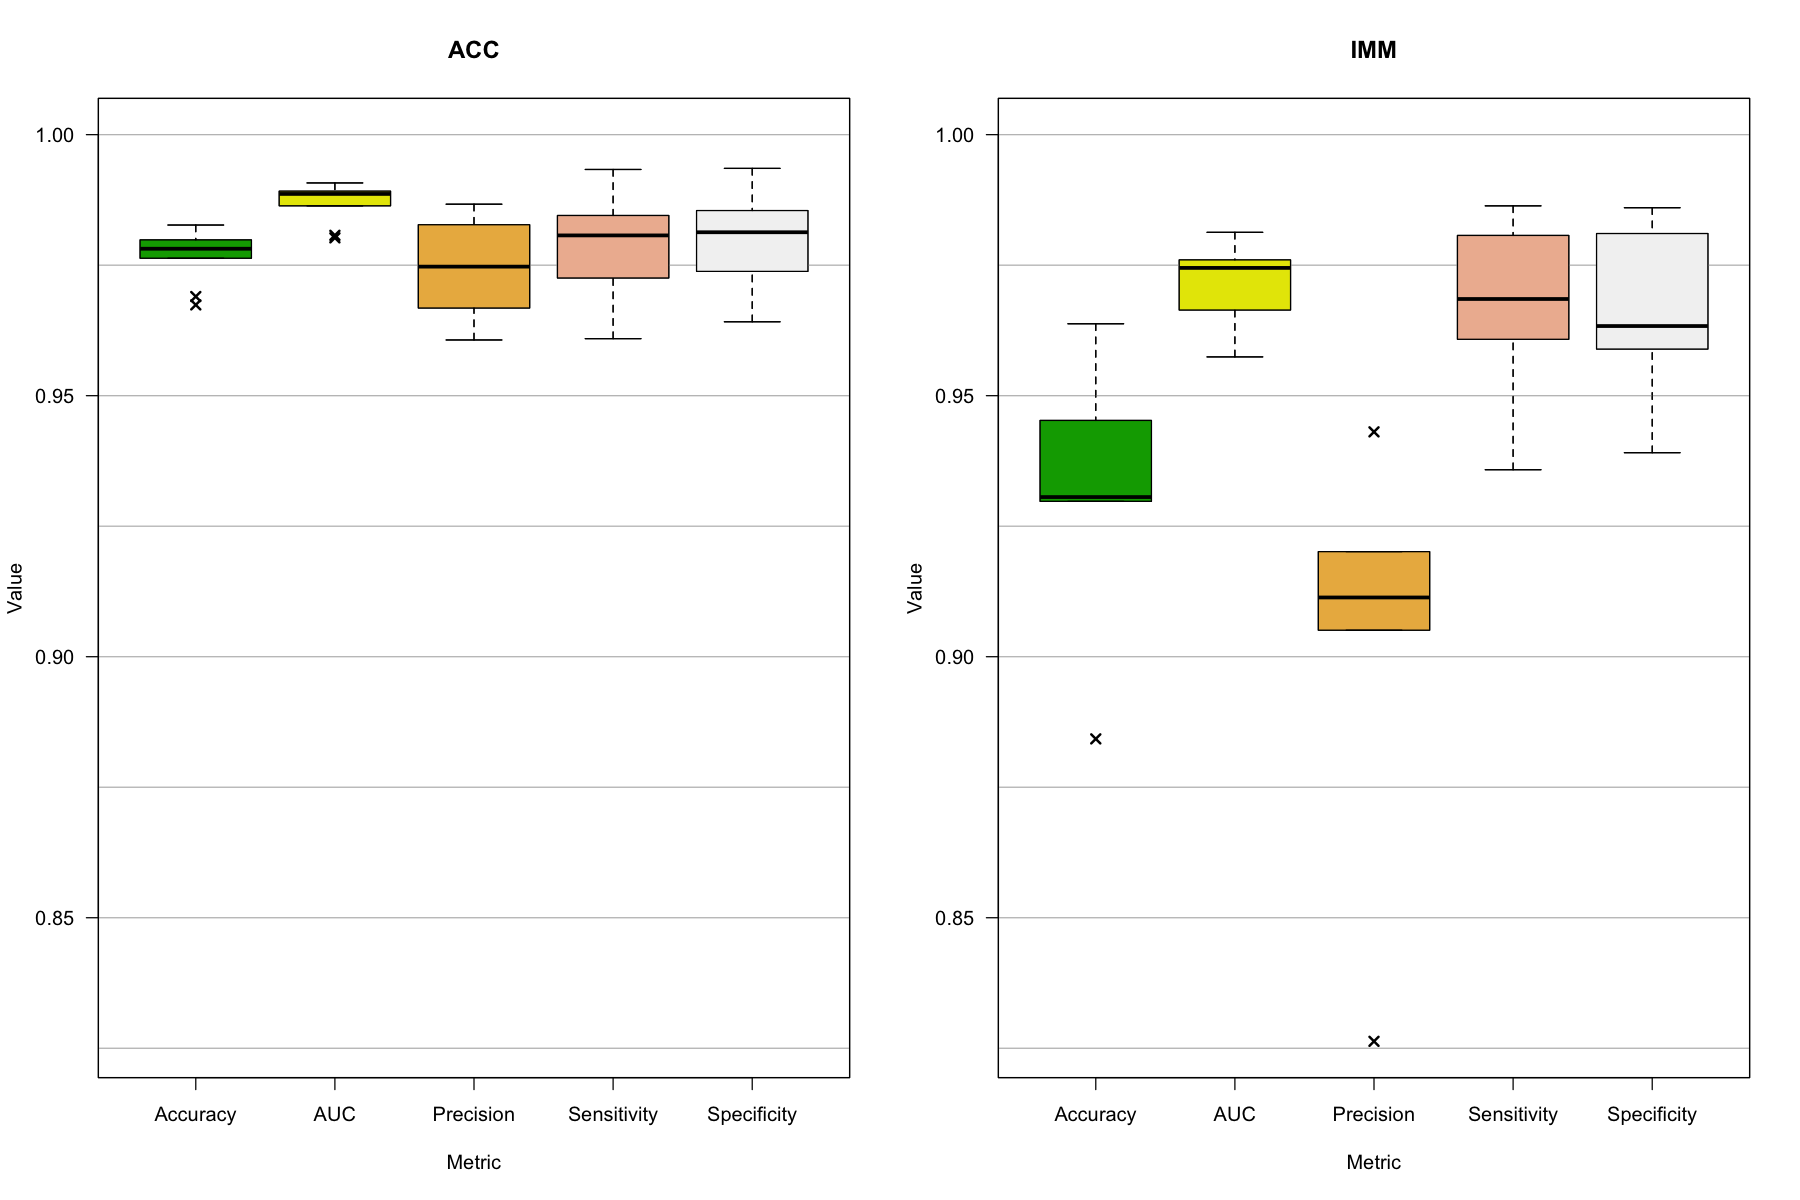

In [130]:
# Prepare a vector of colors with specific color for Nairobi and Eskimo
#myColors <- ifelse(levels(plot.dta$variable)=="Accuracy" , rgb(0.1,0.1,0.7,0.5) , 'white')

nvar = length(unique(plot.dta$variable))

# Split data
plt1 = plot.dta[plot.dta$dtype == 'ACC',]
plt2 = plot.dta[plot.dta$dtype == 'IMM',]

### Plot ###
par(mfrow = c(1,2))
ylim = c(min(plot.dta$value), 1)

# Plot 1
boxplot(plt1$value ~ plt1$variable, ylab="Value" , xlab="Metric", col="white", alpha=1, 
        ylim=ylim, las=1, outline=FALSE, main=unique(plt1$dtype))
abline(h = seq(0.8, 1, 0.025), col = "grey")
boxplot(plt1$value ~ plt1$variable, col=terrain.colors(nvar), alpha=0.6, outpch=4, outlwd=2, ylim=ylim, 
        las=1, type = "n", xaxt='n', yaxt='n', add=TRUE)


# Plot 2
boxplot(plt2$value ~ plt2$variable, ylab="Value" , xlab="Metric", col="white", alpha=1, 
        ylim=ylim, las=1, outline=FALSE, main=unique(plt2$dtype))
abline(h = seq(0.8, 1, 0.025), col = "grey")
boxplot(plt2$value ~ plt2$variable, col=terrain.colors(nvar), alpha=0.3, outpch=4, outlwd=2, ylim=ylim, 
        las=1, type = "n", xaxt='n', yaxt='n', add=TRUE)

# Confusion Matrix

**Imports**

In [352]:
library(data.table)
library(dplyr)
library(caret)
library(cvms)

options(repr.plot.width=5, repr.plot.height=5)  # Resize plot

### Plot

In [463]:
# Load cm data
cm = fread('../Results/ACC_WindowComp_XVal_Metrics_Keras.csv') %>% 
        filter(`Window Size (s)` == 2) %>%
        select("TruePos (%)", "FalsePos (%)", "FalseNeg (%)", "TrueNeg (%)")

# Plot
#cmat = as.table(matrix(round(as.numeric(cm), 1), nrow = 2, byrow = TRUE))
d = 'Dive'
nd = 'Non-dive'

cm.up = round(as.numeric(cm), 1) * 10

# Generate caret confusion matrix
true = c(rep(d, cm.up[1]), rep(nd, cm.up[2]), rep(d, cm.up[3]), rep(nd, cm.up[4]))
pred = c(rep(d, cm.up[1]+cm.up[2]), rep(nd, cm.up[3]+cm.up[4]))
cm = confusionMatrix(as.factor(pred), as.factor(true))$table

**Fourfoldplot**

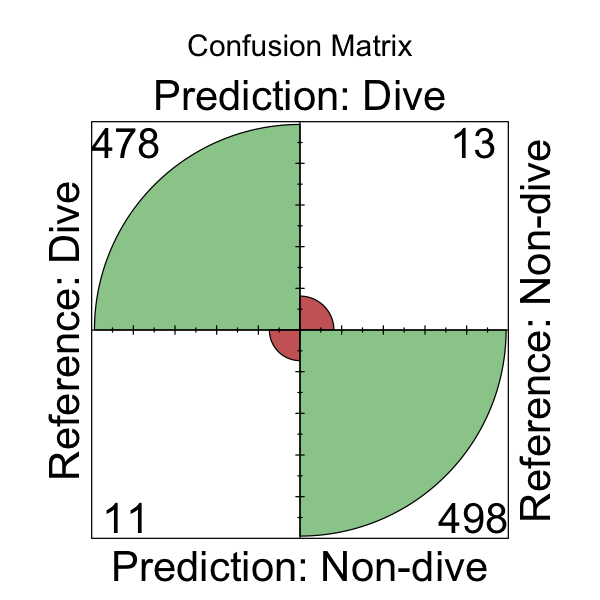

In [459]:
fourfoldplot(cm, color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix", std = c("margins", "ind.max", "all.max"))

**cvms**

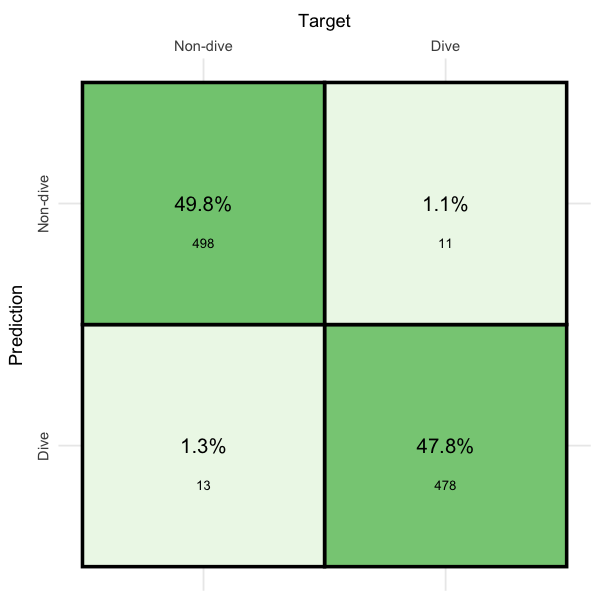

In [354]:
cfm = as_tibble(cm)
plot_confusion_matrix(cfm, 
                      target_col = "Reference", 
                      prediction_col = "Prediction",
                      counts_col = "n"
                      #, class_order = c("Non-dive", "Dive")
                      , add_row_percentages = FALSE
                      , add_col_percentages = FALSE
                      , add_zero_shading = TRUE
                      #, add_sums = TRUE
                      #, add_counts = FALSE
                      , palette = "Greens"
                      #, intensity_by = "counts"
                      #, rotate_y_text = FALSE
                      , tile_border_color = 'black'
                      , tile_border_size = 1
                      , darkness = 0.4 
                
                     )

**Ggplot tile plot**

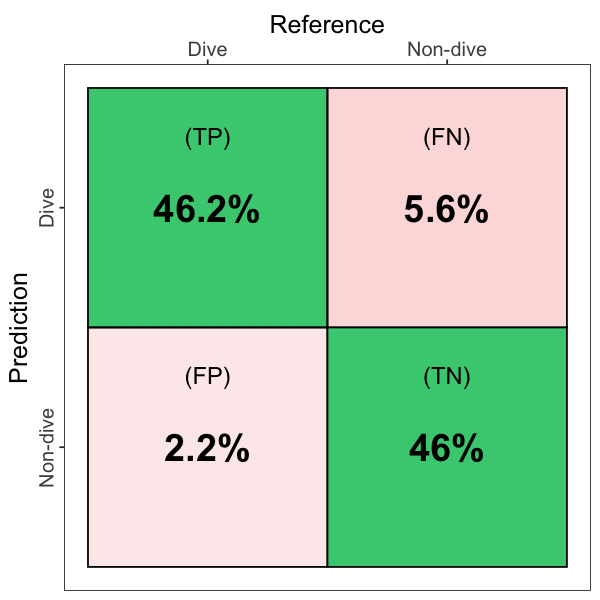

In [466]:
table <- data.frame(cm)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "good", "bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

plotTable$Perc = plotTable$Freq/10

# fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = Perc)) +
  geom_tile(colour='black', size=0.5) +
  geom_text(aes(label = paste0(Perc, '%')), vjust = .5, fontface  = "bold", alpha = 1, size = 8) +
  geom_text(aes(label = c("(TP)", "(FP)", "(FN)", "(TN)")), alpha = 1, position=position_nudge(x = 0, y = 0.3)
, size = 5) +
  scale_fill_manual(values = c(good = "seagreen3", bad = "red2")) +
  theme_bw() +
  scale_x_discrete(lim = levels(table$Reference), position = "top") +
  ylim(rev(levels(table$Reference))) +
  theme(legend.position = "none", panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
       axis.text.y = element_text(angle = 90, hjust = 0.5)
        , text = element_text(size=15)
       # , plot.title = element_text(hjust = 0.5)
       ) #+
  #ggtitle("Confusion Matrix") +
  #labs(caption = "text")
  

* Write specific metrics underneath (in ggplot or LaTeX?)

**Fig. X:** Scaled confusion matrix showing the distribution of errors made by the 300s immersion window classifier accross the full leave-one-out cross-validation process.

# GLS Data

**Imports**

In [837]:
library(FLightR)
library(GeoLight)
library(gridExtra)
library(ggplot2)

**Load/subset data**

In [866]:
gls = fread('../Data/GLS Data 2019 Jan DG RFB Short-term/matched/IMM_ch_gps16_gv37854.csv', na.strings=c("","NA"))
gls$datetime = gls$datetime + 5*60*60  # Add 5 hours for timezone

#attr(gls$datetime, "tzone") = "Indian/Maldives"   # change tzone?
imm = gls[!is.na(`wet/dry`)]
lux = na.omit(gls)

# Make wt/dry col integers
imm$`wet/dry`[imm$`wet/dry`=='wet'] = 1
imm$`wet/dry`[imm$`wet/dry`=='dry'] = 0
imm$`wet/dry` = as.numeric(imm$`wet/dry`)

# Get twilight
twilight = twilightCalc(lux$datetime, lux$`light(lux)`, LightThreshold = TRUE, 
                        maxLight = 5, ask = FALSE, nsee = 500, allTwilights = FALSE)  # change points

**Plot**

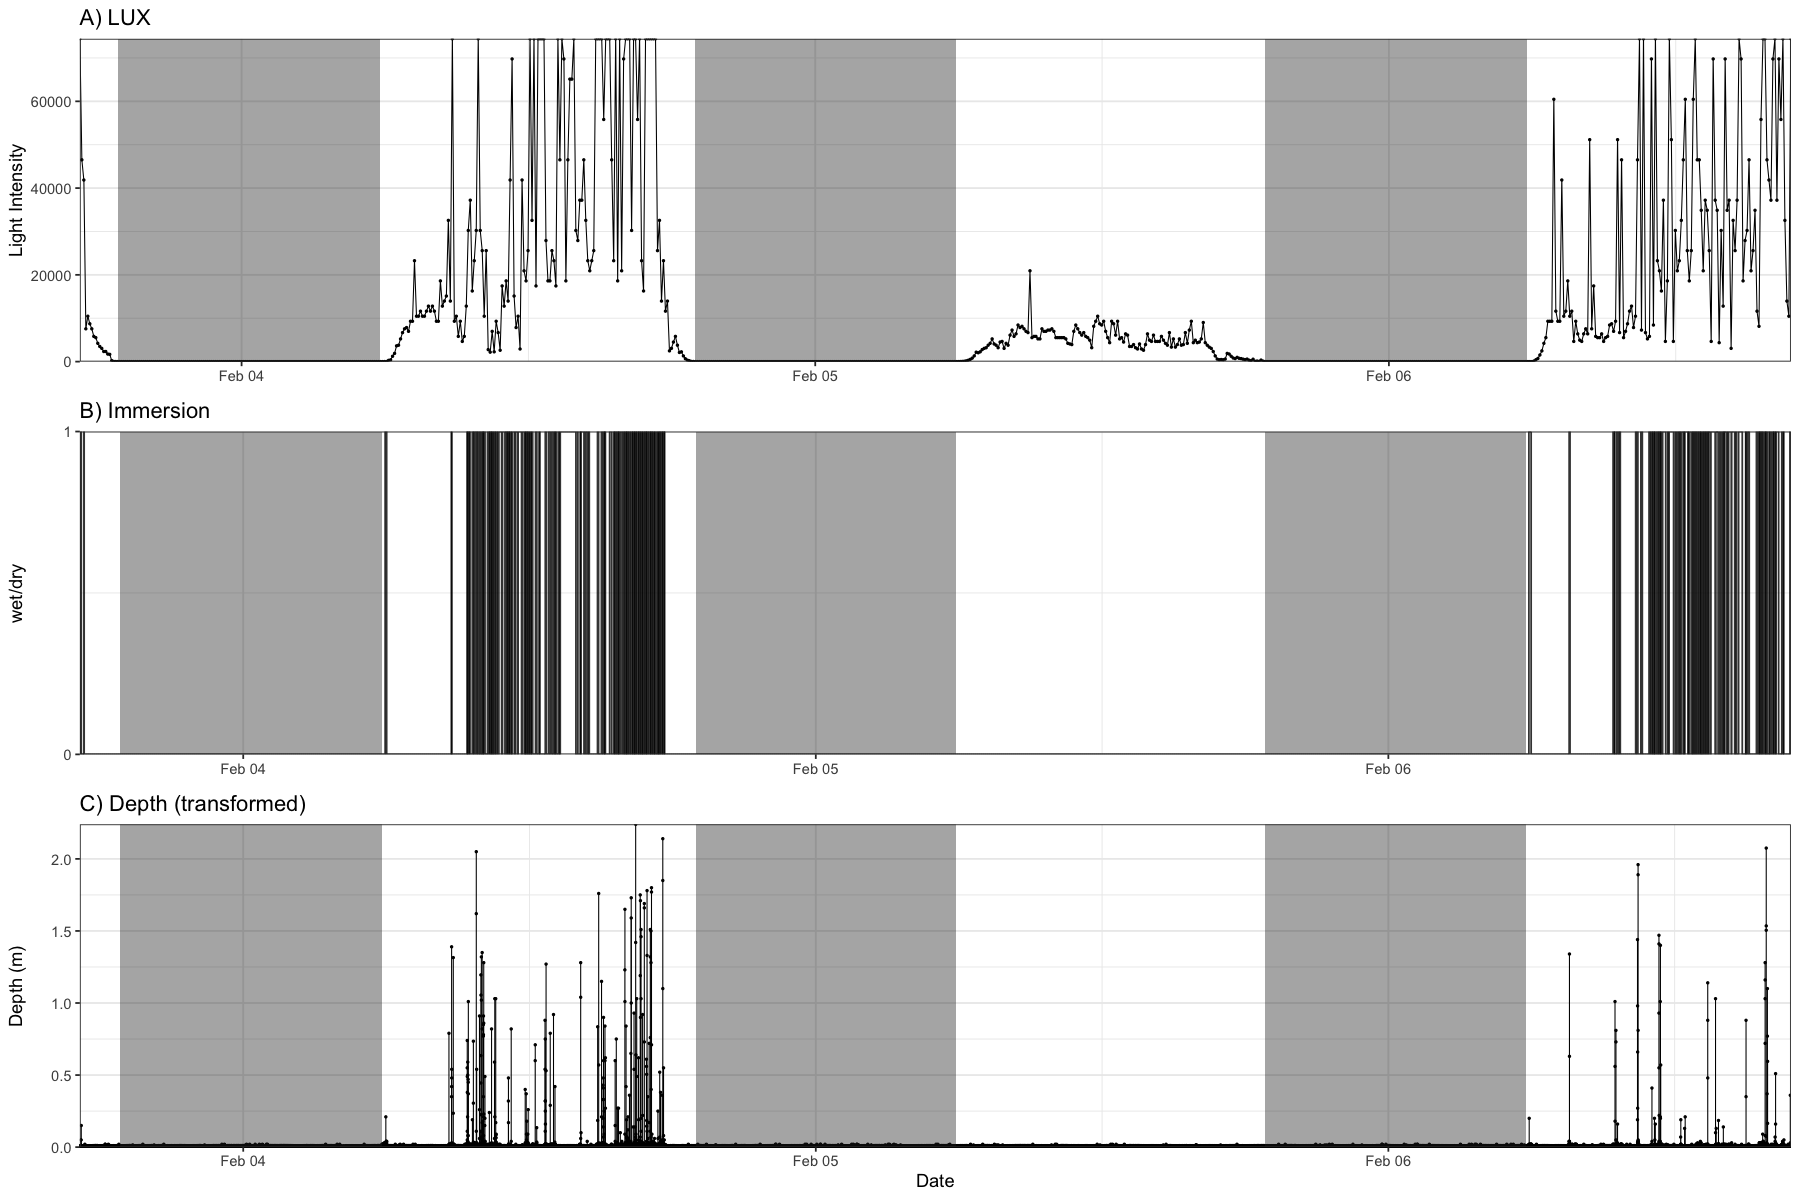

In [871]:
# Plot lux
g1 <- ggplot(data=lux, aes(x=datetime, y=`light(lux)`)) +
    ggtitle("A) LUX") + 
    geom_line(size=0.3) +
    geom_point(size=0.3) + 
    geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
            aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') + 
    scale_x_datetime(expand = c(0,0)) +
    scale_y_continuous(expand = c(0,0)) + 
    ylab("Light Intensity") +
    theme(axis.title.x=element_blank())

# Plot wet/dry
g2 <- ggplot(imm) +  geom_step(aes(x=datetime , y=`wet/dry`),alpha=0.8) +
    ggtitle("B) Immersion") + 
    geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
            aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') +
    scale_x_datetime(expand = c(0,0)) +
    scale_y_continuous(expand = c(0,0), breaks=c(0,1)) + 
    ylab("wet/dry") +
    theme(axis.title.x=element_blank())

g3 <- ggplot(gls, aes(x = datetime, y = Depth_mod))  +  
    geom_line(size = 0.3) + 
    geom_point(size=0.3) + 
    ggtitle("C) Depth (transformed)") + 
    geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
            aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') + 
    scale_x_datetime(expand = c(0,0)) +
    scale_y_continuous(expand = c(0,0)) +
    ylab("Depth (m)") +
    xlab("Date")

gA <- ggplotGrob(g1)
gB <- ggplotGrob(g2)
gC <- ggplotGrob(g3)


grid::grid.newpage()
#pdf('../Plots/MAAZAINE.pdf')
grid::grid.draw(rbind(gA, gB, gC))
#dev.off()

#library(gridExtra)
#grid.arrange(g1, g2, g3) 

#+ scale_x_continuous(xx)
  #theme(axis.text.x= element_text(as.POSIXct(lux$datetime, tz = "Indian/Maldives")))


**Fig .X:** Example distribution of A) light level data; B) salt-water immersion data; and C) depth data for a single bird over the period it was tracked (*ch_gps16*). Dark (night-time) periods are shown shaded grey. The plot shows how the bird iteracts with the water exclusively during daylight hours and spends the whole of Feb 05 off the water, likely staying in a relatively shaded area around the nest. Diving events correlate strongly with periods immersed. 

**Save plots for all files:**

In [ ]:
files =  list.files("../Data/GLS Data 2019 Jan DG RFB Short-term/matched/", pattern = "IMM*", full.names = TRUE)

for (f in files){
    gls = fread(f, na.strings=c("","NA"))
    gls$datetime = gls$datetime + 5*60*60  # Add 5 hours for timezone
    #attr(gls$datetime, "tzone") = "Indian/Maldives"   # change tzone?
    imm = gls[!is.na(`wet/dry`)]
    lux = na.omit(gls)

    # Make wt/dry col integers
    imm$`wet/dry`[imm$`wet/dry`=='wet'] = 1
    imm$`wet/dry`[imm$`wet/dry`=='dry'] = 0
    imm$`wet/dry` = as.numeric(imm$`wet/dry`)

    # Get twilight
    twilight = twilightCalc(lux$datetime, lux$`light(lux)`, LightThreshold = TRUE, 
                            maxLight = 5, ask = FALSE, nsee = 500, allTwilights = FALSE)  # change points
    
    # Plot lux
    g1 <- ggplot(data=lux, aes(x=datetime, y=`light(lux)`)) +
        ggtitle("LUX") + 
        geom_line(size=0.3) +
        geom_point(size=0.3) + 
        geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
                aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') + 
        scale_x_datetime(expand = c(0,0)) +
        scale_y_continuous(expand = c(0,0)) + 
        ylab("Light Intensity") +
        theme(axis.title.x=element_blank())

    # Plot wet/dry
    g2 <- ggplot(imm) +  geom_step(aes(x=datetime , y=`wet/dry`),alpha=0.8) +
        ggtitle("Immersion") + 
        geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
                aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') +
        scale_x_datetime(expand = c(0,0)) +
        scale_y_continuous(expand = c(0,0), breaks=c(0,1)) + 
        ylab("wet/dry") +
        theme(axis.title.x=element_blank())

    g3 <- ggplot(gls, aes(x = datetime, y = Depth_mod))  +  
        geom_line(size = 0.3) + 
        geom_point(size=0.3) + 
        ggtitle("Depth (transformed)") + 
        geom_rect(data=twilight %>% filter(type == 2), inherit.aes=FALSE,
                aes(xmin=tFirst, xmax=tSecond, ymin=0, ymax=Inf), alpha=0.4, fill='gray15') + 
        scale_x_datetime(expand = c(0,0)) +
        scale_y_continuous(expand = c(0,0)) +
        ylab("Depth (m)") +
        xlab("Date/time")

    gA <- ggplotGrob(g1)
    gB <- ggplotGrob(g2)
    gC <- ggplotGrob(g3)
    
    out = paste0("../Plots/GLS_PLT_", tools::file_path_sans_ext(basename(f)), ".pdf")

    grid::grid.newpage()
    pdf(out)
    grid::grid.draw(rbind(gA, gB, gC))
    dev.off()
}

# GPS track with ACC predicitions overlaid

In [70]:
library(dplyr)
library(caret)

fread('../Results/ACC_WindowComp_XVal_Metrics_Keras.csv', stringsAsFactors = FALSE) 

Window Size (s),Accuracy,AUC,Precision,Sensitivity,Specificity,TruePos (%),FalsePos (%),FalseNeg (%),TrueNeg (%)
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.9767421,0.9868463,0.9732569,0.9781358,0.9792395,47.82570,1.314154,1.051852,49.80830
4,0.9669958,0.9762023,0.9759518,0.9557561,0.9590685,46.53554,1.146670,2.121906,50.19588
6,0.9586689,0.9712028,0.9722637,0.9456197,0.9502153,46.55141,1.328000,2.573744,49.54685
8,0.9518853,0.9636691,0.9659151,0.9360269,0.9427025,46.10753,1.627025,2.893279,49.37216
10,0.9504296,0.9577318,0.9725968,0.9251867,0.9330260,45.69400,1.287439,3.434673,49.58389


In [71]:
# Load predicitions
dive.preds = fread('../Results/ACC_2_xval_predictions.csv', stringsAsFactors = FALSE) 
dive.preds$BirdID = gsub('_gv[0-9]+', '_S1', dive.preds$BirdID)  #TODO: this can be deleted once project is rerun as you made change to filename save in depthtoimmersion to only include GPS tag 
colnames(dive.preds)[1] = 'TagID'

#TagIDs = unique(dive.preds$TagID)

# Load depth data
dep.files = list.files("../Data/BIOT_DGBP/BIOT_DGBP/", pattern = paste0('(', paste(TagIDs, collapse = '|'),')', '_dep.csv'), full.names = TRUE)
f=dep.files[1]  # e.g.
dep.data = fread(f, stringsAsFactors = FALSE)
dep.data$TagID = str_remove(dep.data$TagID, "_gv[0-9]+_?[0-9]+") ## this can be removed also
bird = unique(dep.data$TagID)
gps.ix = dep.data[!is.na(`location-lat`)]$ix

# Subset
dive.preds.bird = dive.preds[TagID == bird]
dive.preds.bird = dive.preds.bird[order(dive.preds.bird$ix),]  # chronological order

# Load in true dive data
ACC2 = fread('../Data/Reduced/ACC2_reduced_all_dives.csv') %>% 
        filter(BirdID==bird) %>%
        select('BirdID', 'ix', 'Dive')
colnames(dive.preds.bird)[1] = 'BirdID' # using dive.pred.bird from above
ACC2 = left_join(ACC2, dive.preds.bird, by = c('BirdID','ix'))
ACC2 = ACC2[order(ACC2$ix),] 

head(ACC2)

BirdID,ix,Dive,Prediction
<chr>,<int>,<int>,<int>
ch_gps03_S1,580,0,0
ch_gps03_S1,2114,0,1
ch_gps03_S1,2691,0,1
ch_gps03_S1,3365,0,0
ch_gps03_S1,3635,0,0
ch_gps03_S1,4819,0,0


In [72]:
confusionMatrix(as.factor(ACC2$Prediction), as.factor(ACC2$Dive))  # ALL GOOD!

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 18057   425
         1   700 17100
                                          
               Accuracy : 0.969           
                 95% CI : (0.9672, 0.9708)
    No Information Rate : 0.517           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9379          
                                          
 Mcnemar's Test P-Value : 3.107e-16       
                                          
            Sensitivity : 0.9627          
            Specificity : 0.9757          
         Pos Pred Value : 0.9770          
         Neg Pred Value : 0.9607          
             Prevalence : 0.5170          
         Detection Rate : 0.4977          
   Detection Prevalence : 0.5094          
      Balanced Accuracy : 0.9692          
                                          
       'Positive' Class : 0               
                  

In [73]:
# Match to GPS points nearby
ACC2$ix = sapply(ACC2$ix, function(x) gps.ix[which.min(abs(gps.ix - x))])  # transform ix to nearest gps_ix (i.e. location)
ACC2.gps = unique(ACC2) # drop duplicate rows

confusionMatrix(as.factor(ACC2.gps$Prediction), as.factor(ACC2.gps$Dive))  # FUCKED!

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 10946    49
         1   595   242
                                          
               Accuracy : 0.9456          
                 95% CI : (0.9413, 0.9496)
    No Information Rate : 0.9754          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4075          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9484          
            Specificity : 0.8316          
         Pos Pred Value : 0.9955          
         Neg Pred Value : 0.2891          
             Prevalence : 0.9754          
         Detection Rate : 0.9251          
   Detection Prevalence : 0.9293          
      Balanced Accuracy : 0.8900          
                                          
       'Positive' Class : 0               
                  

In [74]:
# Wherever there are still multiple predictions for same gps ix, keep dive predictions only
dups = ACC2.gps$ix[duplicated(ACC2.gps$ix)] 
ACC2.gps.final = ACC2.gps[!(ix %in% dups & Prediction == 0),]

confusionMatrix(as.factor(ACC2.gps.final$Prediction), as.factor(ACC2.gps.final$Dive)) # FUCKED!

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 10535     0
         1   595   242
                                          
               Accuracy : 0.9477          
                 95% CI : (0.9434, 0.9517)
    No Information Rate : 0.9787          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4297          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9465          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.2891          
             Prevalence : 0.9787          
         Detection Rate : 0.9264          
   Detection Prevalence : 0.9264          
      Balanced Accuracy : 0.9733          
                                          
       'Positive' Class : 0               
                  

In [76]:
head(loc.data)

BirdID,X,Y,Z,Activity,Depth,Temp. (?C),location-lat,location-lon,height-msl,⋯,Sensor Raw,Metadata,Depth_mod,ix,datetime,Mean_depth_m,Max_depth_m,Dive,Prediction,ConfMatrix
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<lgl>,<dbl>,<int>,<dttm>,<dbl>,<dbl>,<int>,<int>,<chr>
ch_gps03_S1,0.188,-0.313,1.000,Active/Dry,0,27.1,-7.24941,72.45086,-6,⋯,995,NA,0,325,2019-02-02 13:20:01,0.0000000000,0.00,0,0,TN
ch_gps03_S1,0.281,-0.047,1.094,Active/Dry,0,26.7,-7.24810,72.45079,16,⋯,995,NA,0,1100,2019-02-02 13:20:32,0.0000000000,0.00,NA,NA,NA
ch_gps03_S1,0.844,-0.281,1.985,Active/Dry,0,26.6,-7.25031,72.45170,8,⋯,995,NA,0,1825,2019-02-02 13:21:01,0.0000000000,0.00,0,1,FP
ch_gps03_S1,0.172,-0.203,1.125,Active/Dry,0,26.5,-7.24998,72.45129,32,⋯,995,NA,0,2575,2019-02-02 13:21:31,0.0000000000,0.00,0,1,FP
ch_gps03_S1,0.281,-0.031,1.282,Active/Dry,0,26.5,-7.25050,72.45165,20,⋯,995,NA,0,3325,2019-02-02 13:22:01,0.0000000000,0.00,0,0,TN
ch_gps03_S1,0.250,-0.047,0.844,Active/Dry,0,26.5,-7.25035,72.45128,20,⋯,995,NA,0,4075,2019-02-02 13:22:31,0.0009677419,0.01,NA,NA,NA


ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (1): x and y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_te

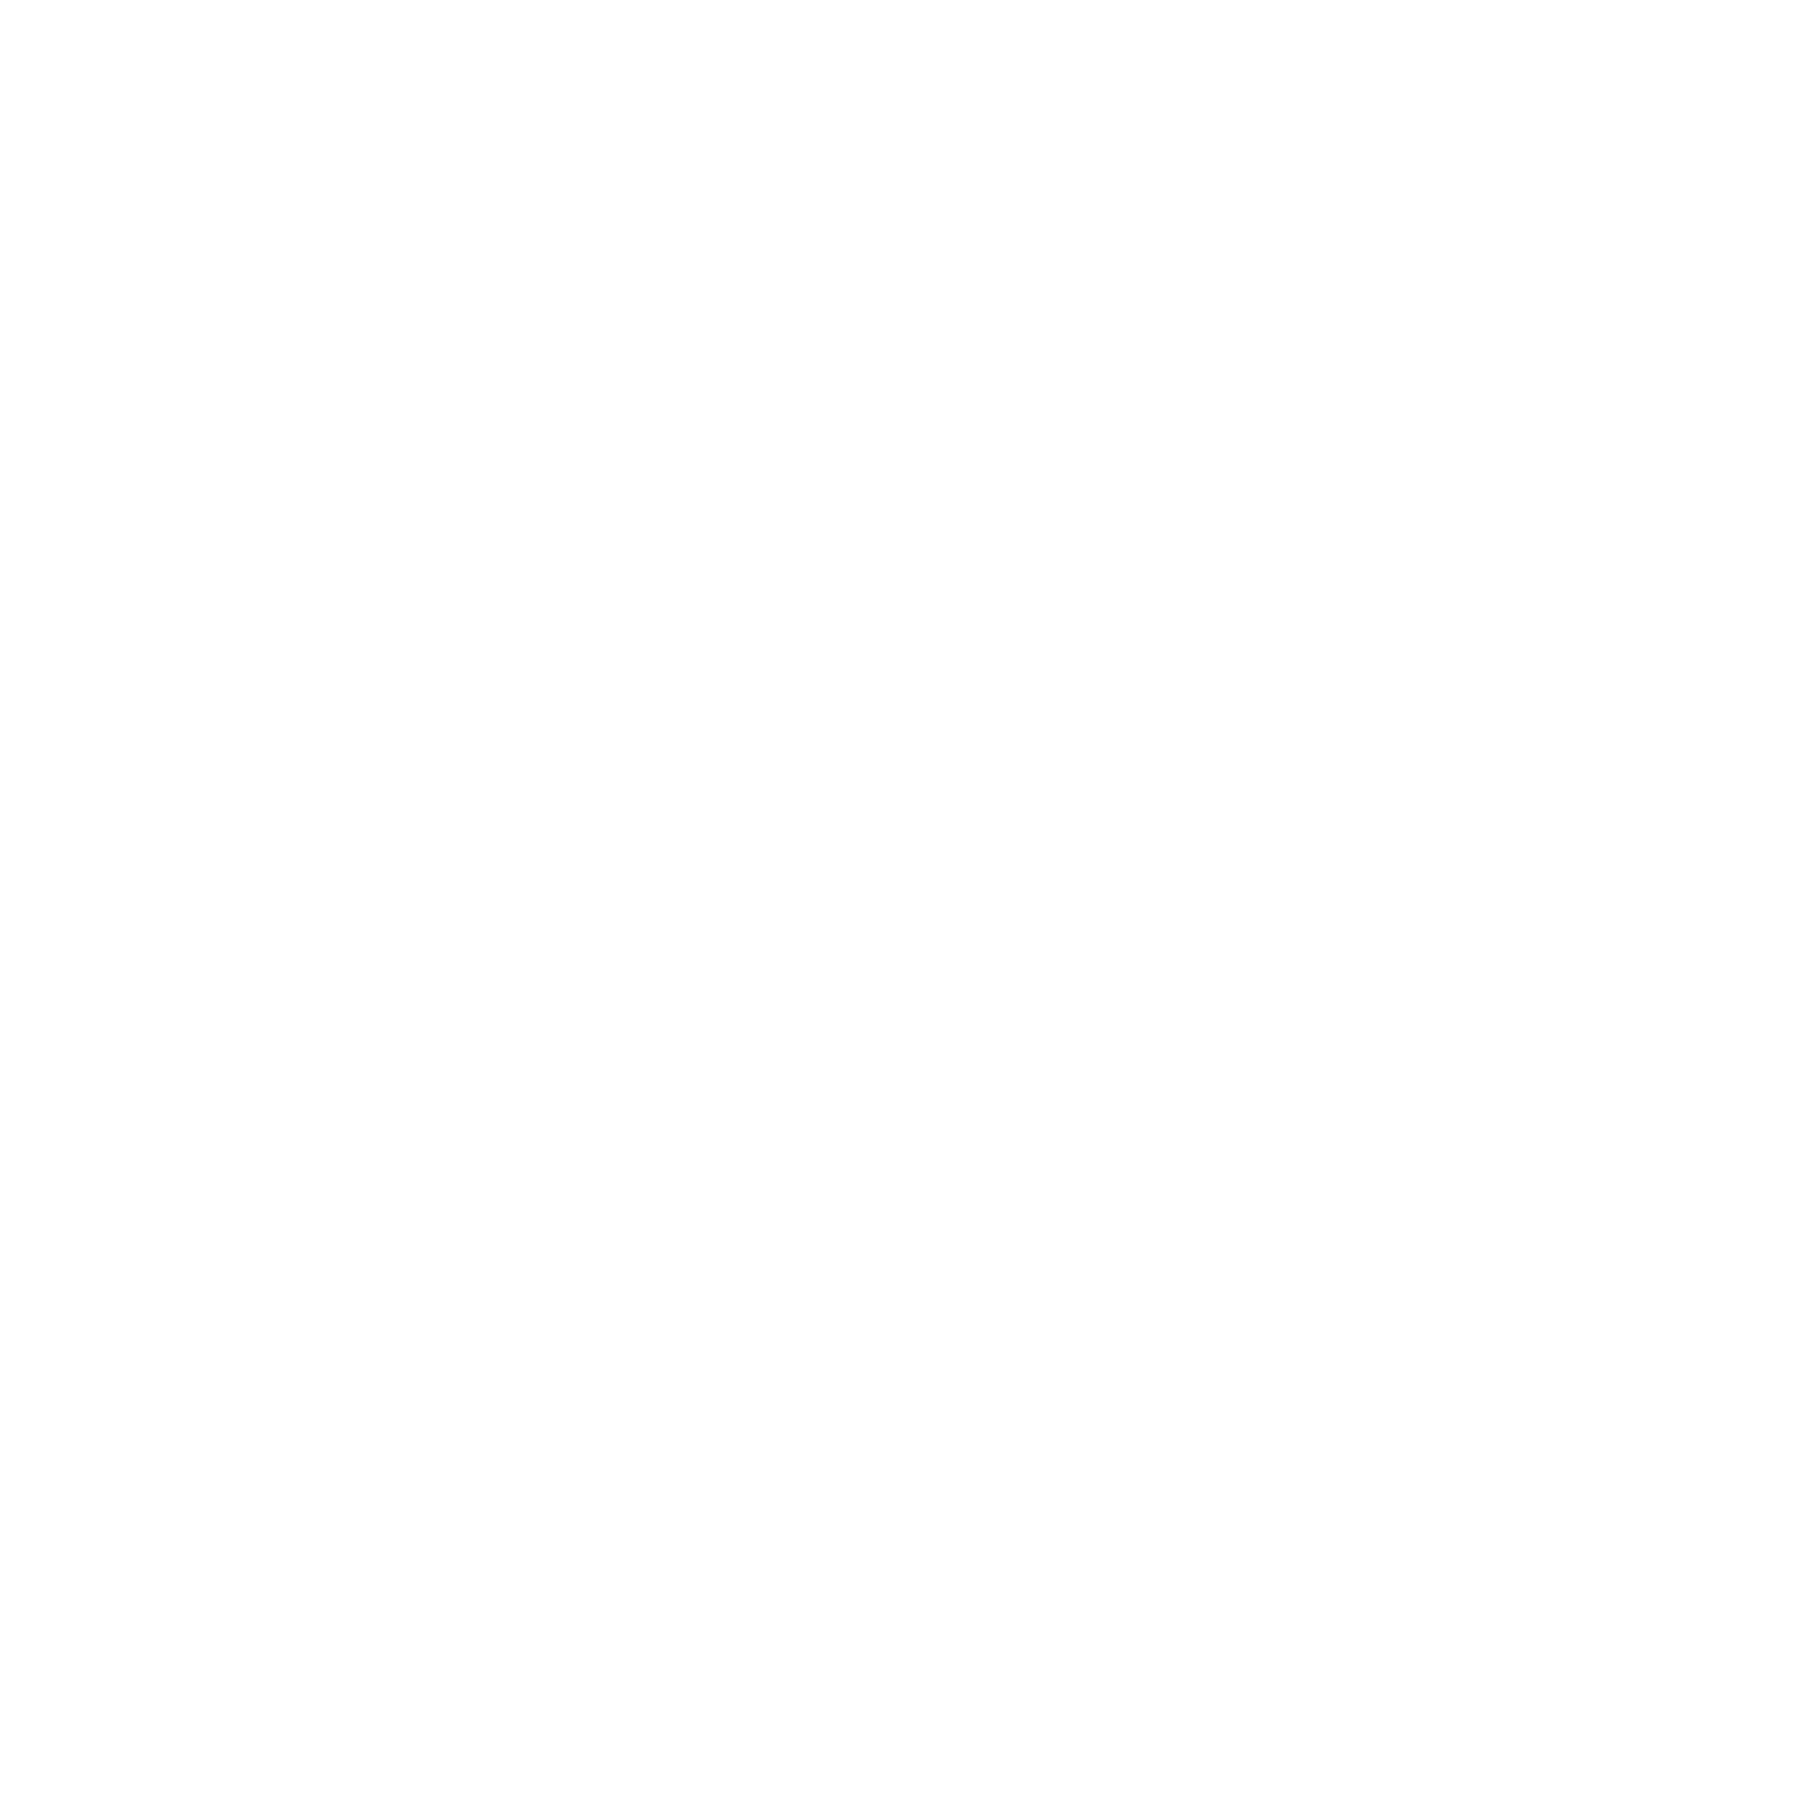

In [75]:
# Join to GPS data and plot
loc.data = dep.data[!is.na(`location-lon`)]
colnames(loc.data)[1] = 'BirdID'
loc.data = left_join(loc.data, ACC2.gps.final, by=c('ix', 'BirdID'))


## add conf matrix field
loc.data$ConfMatrix = apply(loc.data %>% select('Dive', 'Prediction'), 1, function(v){
    if (is.na(v[1]) | is.na(v[2])){
      return(NA)
    } else if (v[1] == 1 & v[2] == 1){
      return("TP")
    } else if (v[1] == 1 & v[2] == 0){
      return("FN")
    } else if (v[1] == 0 & v[2] == 1){
      return("FP")
    } else if (v[1] == 0 & v[2] == 0){
      return("TN")
    } 
  })
  
lox <- loc.data %>% 
  select(`location-lat`, `location-lon`, 'ConfMatrix') %>% 
  filter(ConfMatrix %in% c("FP", "TP", "FN"))

ggplot(data = world) +
  #annotation_map_tile(type = esri_ocean) +
  #annotation_map_tile(type = "hikebike") +
  geom_sf(data = eez,  alpha=0.3, linetype = "dashed", fill="white") +  # MPA
  geom_sf(data = chagos.back, fill = 'lightgray', colour = 'lightgray') +  # Chagos Land
  geom_sf(data = chagos.land, colour='gray25', fill = 'gray25', size=0.5) +  # Chagos Land
  coord_sf(xlim = range(loc.data$`location-lon`) + c(-0.5, 0.5), ylim = range(loc.data$`location-lat`) + c(-0.5, 0.5), expand = FALSE) +
  annotation_scale(location = "bl", width_hint = 0.5) + # scale bar
  xlab("Longitude") + ylab("Latitude") + 
  ggtitle("GPS track with dives overlaid", subtitle = bird) +
  #annotate(geom = "text", x = -7, y = 72.5, label = "Gulf of Mexico", 
  #  fontface = "italic", color = "grey22", size = 6) +
  geom_path(data = loc.data, aes(x = `location-lon`, y = `location-lat`), colour='blue3', alpha=.5) + 
  #geom_point(data = lox[Dive == FALSE], aes(x = `location-lon`, y = `location-lat`), colour='red3', shape=17, size=.5) + 
  #geom_point(data = lox[Dive == TRUE], aes(x = `location-lon`, y = `location-lat`), colour='black', shape=2, size=2) + 
  #geom_point(data = lox[Dive == TRUE], aes(x = `location-lon`, y = `location-lat`), colour='green4', shape=17, size=3, alpha = 0.5) +
  geom_point(data = lox[ConfMatrix == "FP"], aes(x = `location-lon`, y = `location-lat`, colour='orange'), shape=1, size=3, alpha = 0.6, stroke=0.8) + 
  geom_point(data = lox[ConfMatrix == "TP"], aes(x = `location-lon`, y = `location-lat`, colour='green4'), shape=1, size=3, alpha = 0.7, stroke=0.8) + 
  geom_point(data = lox[ConfMatrix == "FN"], aes(x = `location-lon`, y = `location-lat`, colour='red'), shape=1, size=3, alpha = 0.7, stroke=0.8) + 
  scale_color_identity(name = "Metric",
                       breaks = c("green4", "red", "orange"),
                       labels = c("True Positives", "False Negatives", "False Positives"),
                       guide = "legend")
